## Tweets Analysis

This notebook is the starting point of an algorithm for tweets analysis. It means that we want to provide a notebook that can evaluate the values of Bitcoins by analyzing a huge number of tweets.

Let's start importing useful libraries and reading data from the folder Data.


In [1]:
import numpy as np
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
#nltk.download('punkt')

In [2]:
# reading data from .csv file

data_path = os.path.join('Data', 'Bitcoin_tweets.csv')
tweets = pd.read_csv(data_path)

tweets.head()

C:\Users\masigi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [3]:
# clean data removing unuseful fields (at the moment, I reduce the dataset in order to try to apply 
# text analysis with smaller dataset)

data = tweets[['user_description','text','hashtags', 'source']][0:10000]
data.head(20)

,user_description,text,hashtags,source
0,"Biz Consultant, real estate, fintech, startups...",Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App
1,😎 BITCOINLIVE is a Dutch platform aimed at inf...,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android
2,"IM Academy : The best #forex, #SelfEducation, ...","Guys evening, I have read this article about B...",NaN,Twitter Web App
3,I will post a lot of buying signals for BTC tr...,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it
4,Co-founder @RENJERJerky | Forbes 30Under30 | I...,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App
5,I'm a cat slave 🐱 Interested in Blockchain · T...,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App
6,Bot to generate Bitcoin picture as combination...,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot
7,Stay updated on the main cryptocurrencies of t...,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR
8,"Technical Analyst | Trader\n\nNo certainty, on...",#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App
9,"Biz Consultant, real estate, fintech, startups...",.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App


In [4]:
print(data['source'].unique())
print(len(data['source'].unique()))

['Twitter Web App' 'Twitter for Android' 'dlvr.it' 'BTC_p_bot'
 'Cryptocurrencies prices to EUR' 'Bittrex Prices' 'CryptoSquawkBot'
 'Twitter for iPhone' 'Hootsuite Inc.' 'Buffer' 'Kraken prices' 'Paper.li'
 'Bitcoin Degisti!' 'HashTagTrendRoy' 'RdemirTwitBot' 'Twitter for iPad'
 'twittbot.net' 'Cream Auto Tweet' 'datapool.app' 'paulcrypto'
 'Twibble.io' 'AwebAnalysis' 'TweetDeck' 'Cryptocurrencies prices to USD'
 'Integromat' 'SmarterQueue' 'IFTTT' 'yadio' 'CoinTweety' 'CoinTrendz'
 'CoinStats' 'KurNeOldu' 'KurKacOldu' 'ClankApp' 'bitcoinagile' nan
 'Twemzy' 'esnappy' 'MagicPot' 'Instagram' 'Pipedream, Inc' 'BidNews'
 'SocialOomph' 'CryptoTradeBot2' 'CoSchedule' 'Cheap Bots, Done Quick!'
 'The Tweeted Times' 'Periscope' 'CryptoKelly' 'Genius Crypto'
 'btc manager wordpress news' 'VIP SIGNLS' 'LinkedIn' 'WordPress.com'
 'SocialBee.io v2' 'FS Poster' 'The Signal Feed' 'Bitly' 'Members Area'
 'Dynamic Signal' 'LaterMedia' 'Data Ctrading News' 'Twitter for Mac'
 'boc.vip' 'CryptoPriceBTC'

## Pre Analysis of data 
Perform some basic data analysis on data

In [5]:
def plot_hist(hist_to_plot, title, ascending):
    plt.figure(figsize=(30, 15))
    hist_to_plot.value_counts().sort_values(ascending= ascending).plot.bar(title=title)
    plt.tight_layout()    
    plt.show()

Number of tweets : 2573255
Number of occurences for each source: 
Twitter Web App        3129
Twitter for Android    2127
Twitter for iPhone     2102
IFTTT                   245
CryptoSquawkBot         180
                       ... 
Posts to zwitter          1
LNSwebserver              1
DailyBTCEur               1
cryptoreview_ai           1
CBG-BOT                   1
Name: source, Length: 139, dtype: int64


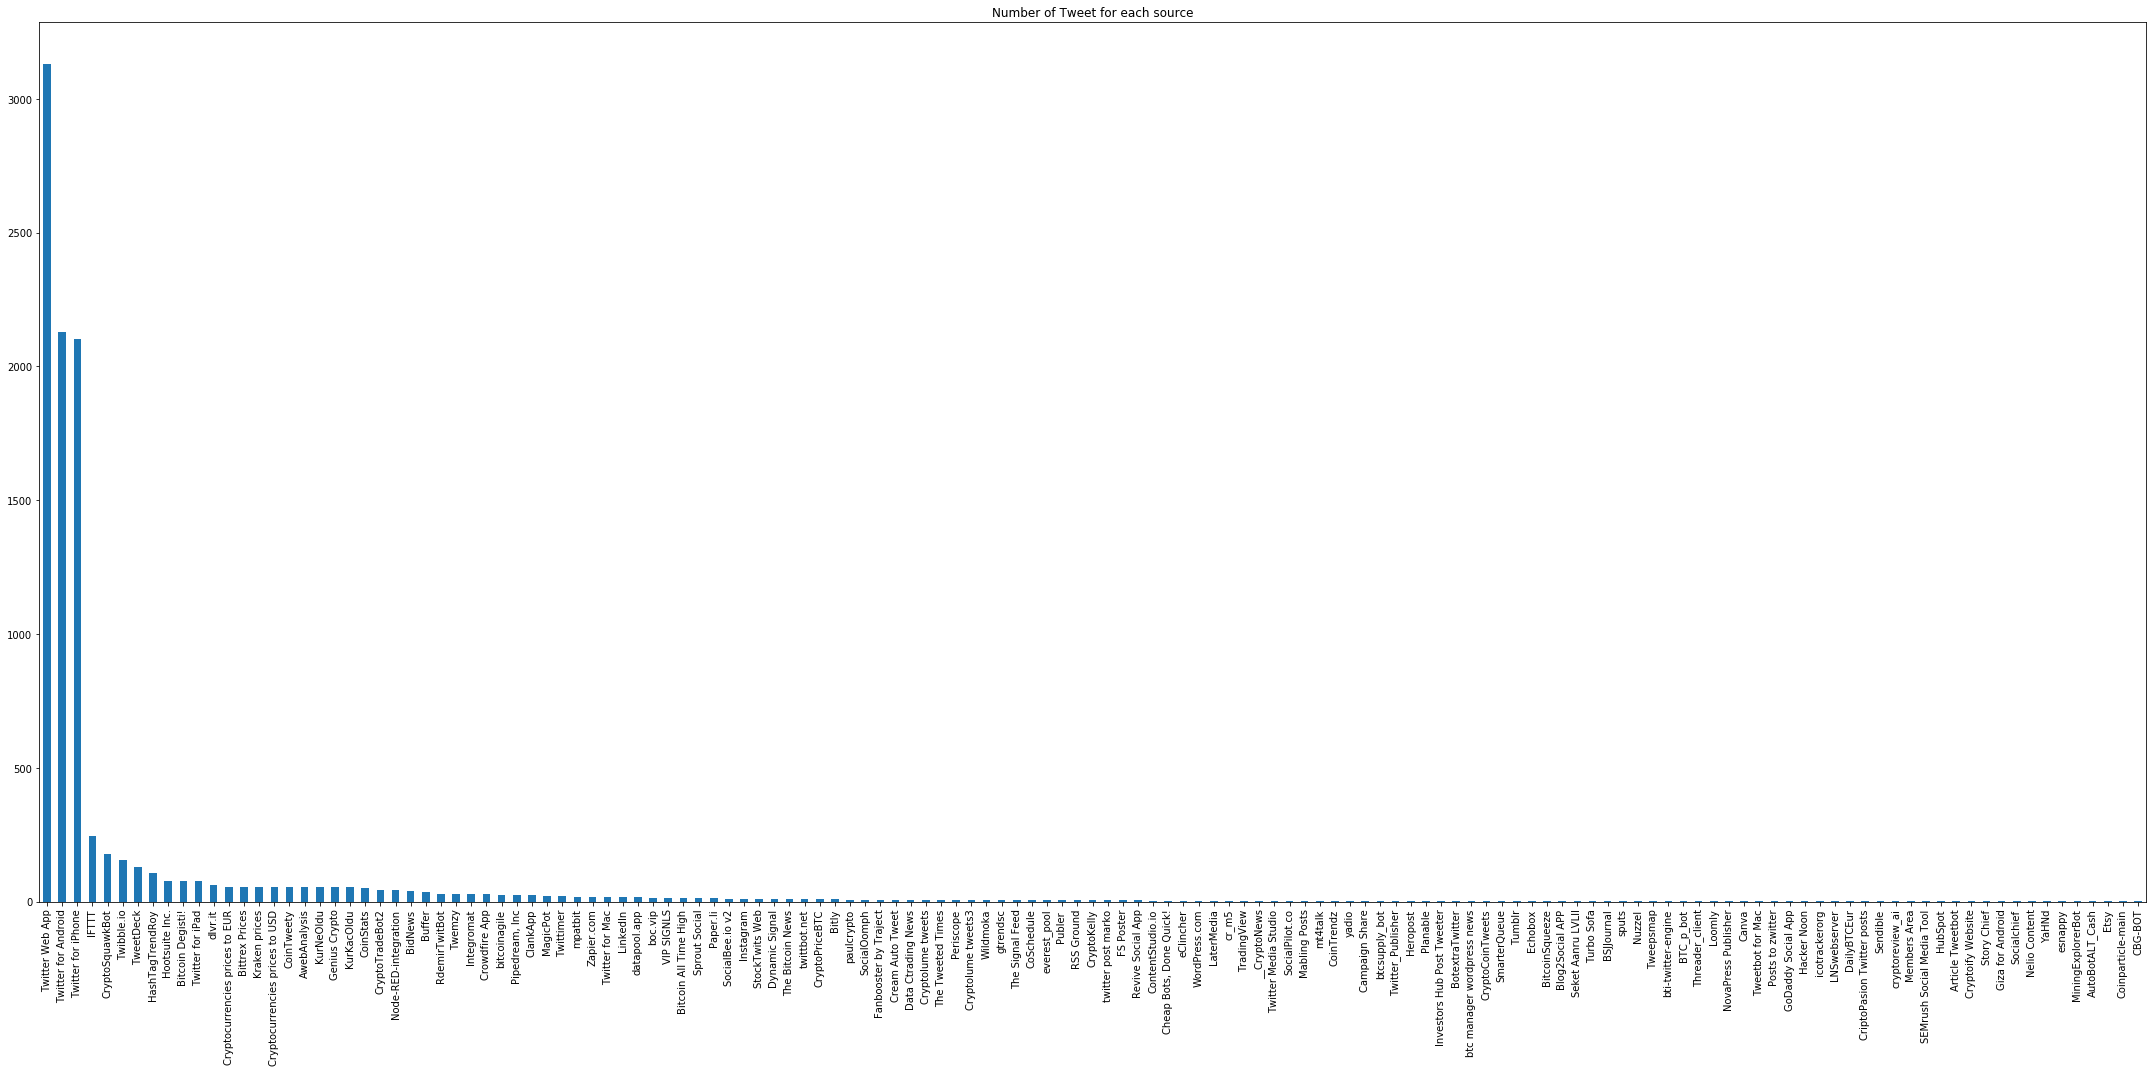

Plot Tweets more popular:


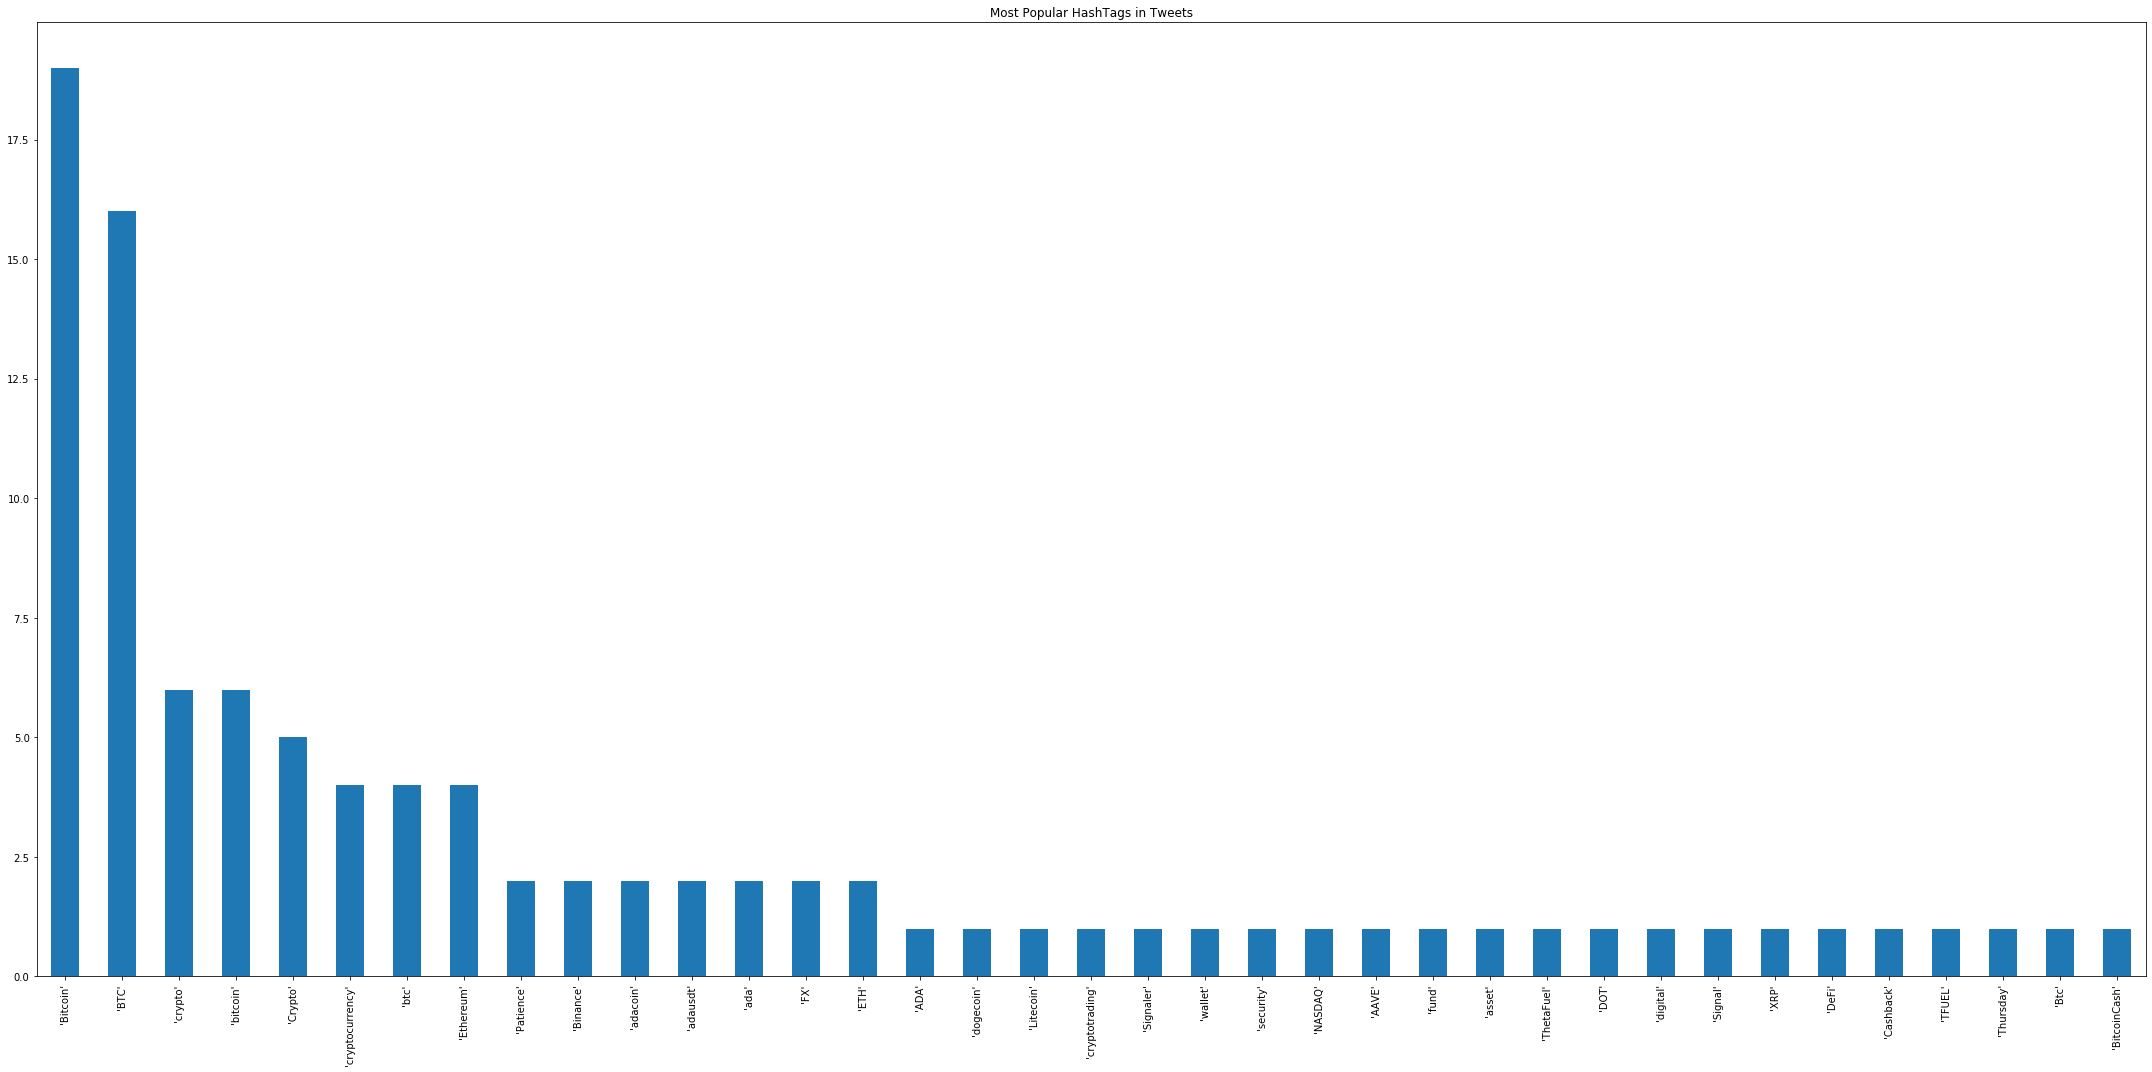

In [6]:
print("Number of tweets : " + str(len(tweets)))
print("Number of occurences for each source: ")
print(data['source'].value_counts())

# Plot for each source, the number of tweet
plot_hist(data['source'], 'Number of Tweet for each source', False)

# Plot popular hashtag
hashtags = list()
for hashtag in data['hashtags']:
    if type(hashtag) == str:
        stripped= hashtag.strip('][').split(', ')
        hashtags += stripped

print('Plot Tweets more popular:')
tmp = pd.DataFrame({'hashtags':hashtags})
plot_hist(tmp['hashtags'][:100], 'Most Popular HashTags in Tweets', False)

### Timeline creation


### Text Preprocessing


Plot the WordCloud of the words in the text of tweets

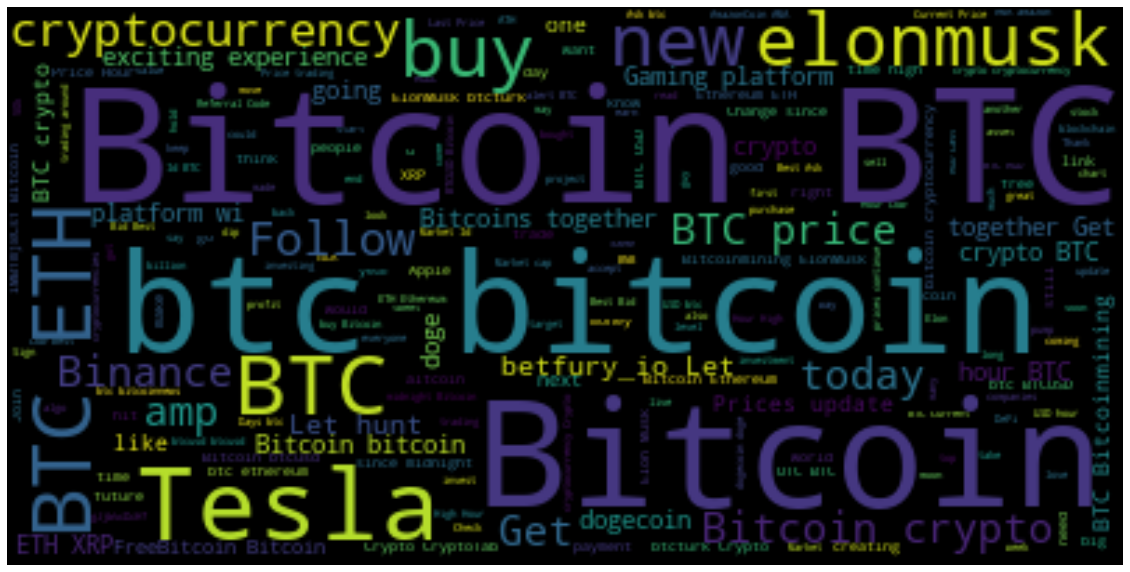

In [7]:
stop_words = set(stopwords.words('english'))
stop_words.add('https')
stop_words.add('co')
stop_words.update(["br", "href"])

textt = " ".join(tweet for tweet in data.text)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud11.png') # Uncomment if you want the picture stored locally
plt.show()

Now we try to remove the stopwords in the text of tweets

In [8]:
def stopwords_remove(tweet):
    # transform each tweet text in lowercase
    tweet = tweet.lower()
    # get only alphanumeric chars
    tweet = re.sub(r"[^a-zA-Z0-9]", " ", tweet)
    # remove stopwords, get the stopwords from previous cell
    #stop_words = set(stopwords.words('english'))
    #stop_words.add('https')
    # tokenize words
    word_tokens = word_tokenize(tweet)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return filtered_sentence

In [9]:
# Removing stop words

real_text = []
for tweet in data.text:
    new_tweet = stopwords_remove(tweet)
    real_text.append(new_tweet)
    
data['real_text'] = real_text
data.head(5)
    
    

,user_description,text,hashtags,source,real_text
0,"Biz Consultant, real estate, fintech, startups...",Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,"[blue, ridge, bank, shares, halted, nyse, bitc..."
1,😎 BITCOINLIVE is a Dutch platform aimed at inf...,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,"[today, thursday, take, 2, friend, leowandersl..."
2,"IM Academy : The best #forex, #SelfEducation, ...","Guys evening, I have read this article about B...",NaN,Twitter Web App,"[guys, evening, read, article, btc, would, lik..."
3,I will post a lot of buying signals for BTC tr...,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,"[btc, big, chance, billion, price, 4872644, 0,..."
4,Co-founder @RENJERJerky | Forbes 30Under30 | I...,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,"[network, secured, 9, 508, nodes, today, soon,..."


In [10]:
print(data.loc[0].text)
print(data.loc[0].real_text)

Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement https://t.co/xaaZmaJKiV @MyBlueRidgeBank… https://t.co/sgBxMkP1SI
['blue', 'ridge', 'bank', 'shares', 'halted', 'nyse', 'bitcoin', 'atm', 'announcement', 'xaazmajkiv', 'myblueridgebank', 'sgbxmkp1si']


# VADER
(Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [11]:
analyzer = SentimentIntensityAnalyzer()
compound = []
neg = []
neu = []
pos = []
for i,s in enumerate(tqdm(data['real_text'],position=0, leave=True)):
    vs = analyzer.polarity_scores(str(s))
    neg.append(vs["neg"])
    neu.append(vs["neu"])
    pos.append(vs["pos"])
    compound.append(vs["compound"])
data["neg"] = neg
data["neu"] = neu
data["pos"] = pos
data["compound"] = compound
data.head(20)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 7300.91it/s]


,user_description,text,hashtags,source,real_text,neg,neu,pos,compound
0,"Biz Consultant, real estate, fintech, startups...",Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,"[blue, ridge, bank, shares, halted, nyse, bitc...",0.000,0.833,0.167,0.2960
1,😎 BITCOINLIVE is a Dutch platform aimed at inf...,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,"[today, thursday, take, 2, friend, leowandersl...",0.000,0.616,0.384,0.6808
2,"IM Academy : The best #forex, #SelfEducation, ...","Guys evening, I have read this article about B...",NaN,Twitter Web App,"[guys, evening, read, article, btc, would, lik...",0.000,0.630,0.370,0.5719
3,I will post a lot of buying signals for BTC tr...,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,"[btc, big, chance, billion, price, 4872644, 0,...",0.000,0.882,0.118,0.2500
4,Co-founder @RENJERJerky | Forbes 30Under30 | I...,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,"[network, secured, 9, 508, nodes, today, soon,...",0.192,0.659,0.148,-0.2023
5,I'm a cat slave 🐱 Interested in Blockchain · T...,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,"[trade, crypto, binance, enjoy, cashback, 10, ...",0.000,0.775,0.225,0.4939
6,Bot to generate Bitcoin picture as combination...,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,"[lt, fire, amp, man, gt, bitcoin, crypto, btc,...",0.231,0.769,0.000,-0.3400
7,Stay updated on the main cryptocurrencies of t...,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,"[prices, update, eur, 1, hour, btc, 37082, 1, ...",0.000,1.000,0.000,0.0000
8,"Technical Analyst | Trader\n\nNo certainty, on...",#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,"[btc, bitcoin, ethereum, eth, crypto, cryptotr...",0.000,1.000,0.000,0.0000
9,"Biz Consultant, real estate, fintech, startups...",.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,"[tesla, bitcoin, investment, revolutionary, cr...",0.000,1.000,0.000,0.0000


In [12]:
data[data['compound'] > 0.5]

,user_description,text,hashtags,source,real_text,neg,neu,pos,compound
1,😎 BITCOINLIVE is a Dutch platform aimed at inf...,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,"[today, thursday, take, 2, friend, leowandersl...",0.0,0.616,0.384,0.6808
2,"IM Academy : The best #forex, #SelfEducation, ...","Guys evening, I have read this article about B...",NaN,Twitter Web App,"[guys, evening, read, article, btc, would, lik...",0.0,0.630,0.370,0.5719
31,"Biz Consultant, real estate, fintech, startups...",The @Grayscale #Bitcoin Trust: What it is and ...,"['Bitcoin', 'digital', 'asset', 'fund', 'BTC']",Twitter Web App,"[grayscale, bitcoin, trust, works, 4tbfib2nvz,...",0.0,0.608,0.392,0.7003
37,$DOT $LINK $TEL $ZIL $RSR $GRT $CRV 💎🙌🏾,Three of my precious gems reached their ATH to...,NaN,Twitter Web App,"[three, precious, gems, reached, ath, today, l...",0.0,0.746,0.254,0.6249
40,Lucky fool making decisions and money based on...,Free #Mailey Advice:\n\nImagine in 2019 there ...,"['Mailey', 'Bitcoin', 'BTC']",Twitter Web App,"[free, mailey, advice, imagine, 2019, bitcoin,...",0.0,0.798,0.202,0.5106
...,...,...,...,...,...,...,...,...,...
9976,NaN,#Egld is the next #Bitcoin . I downloaded the...,"['Egld', 'Bitcoin']",Twitter for iPhone,"[egld, next, bitcoin, downloaded, maiar, app, ...",0.0,0.687,0.313,0.6249
9983,Blockchain forged and molded in the #Bitcoin b...,🧑‍🚀@Tesla buying $1.5 billion worth of Bitcoin...,"['GOLD', 'Celsius']",Twitter Web App,"[tesla, buying, 1, 5, billion, worth, bitcoin,...",0.0,0.743,0.257,0.5423
9985,#1 exchange in liquidity for new digital asset...,LATOKEN #Bitcoin Giveaway 💰\n\n5 lucky winners...,"['Bitcoin', 'BTC']",Hootsuite Inc.,"[latoken, bitcoin, giveaway, 5, lucky, winners...",0.0,0.577,0.423,0.8316
9997,"Moche, bête et méchant, un véritable attrape M...",I am amazed there are still imbeciles buying B...,"['Tesla', 'BTC']",Twitter Web App,"[amazed, still, imbeciles, buying, bsv, news, ...",0.0,0.667,0.333,0.6124


In [13]:
data[data['compound'] < -0.5]

,user_description,text,hashtags,source,real_text,neg,neu,pos,compound
13,It's all a market of markets.\n\nPast performa...,#Bitcoin #BTC $BTC $GBTC $RIOT $MARA $ETH $ETH...,"['Bitcoin', 'BTC', 'AAVE', 'DeFi', 'Crypto', '...",Twitter for Android,"[bitcoin, btc, btc, gbtc, riot, mara, eth, eth...",0.175,0.825,0.000,-0.5574
106,Late to the party. One of the illest 🤫,dip down to 39kish tomorrow? should stir enoug...,"['btc', 'Bitcoin']",Twitter Web App,"[dip, 39kish, tomorrow, stir, enough, panic, b...",0.292,0.708,0.000,-0.5106
125,Are you ready to make a difference?\n\nGet $10...,https://t.co/zdsqyF1dxf #Ethereum killers and ...,"['Ethereum', 'Bitcoin']",Twibble.io,"[zdsqyf1dxf, ethereum, killers, layer, 2, toke...",0.368,0.632,0.000,-0.7506
126,This is an informational account about Opportu...,"$BTC bounce fail. I know, I mentioned about u...",NaN,Twitter for iPhone,"[btc, bounce, fail, know, mentioned, upside, m...",0.200,0.800,0.000,-0.5423
136,"Breaking News. Bitcoin, Blockchain & Beyond. #...",#ethereum killers and layer-2 tokens rally des...,"['ethereum', 'bitcoin', 'crypto', 'btc']",bitcoinagile,"[ethereum, killers, layer, 2, tokens, rally, d...",0.348,0.652,0.000,-0.7506
...,...,...,...,...,...,...,...,...,...
9796,"Cuban born, American raised. Chef and Owner of...",@PeterSchiff @elonmusk Why is anyone still was...,NaN,Twitter for iPhone,"[peterschiff, elonmusk, anyone, still, wasting...",0.321,0.679,0.000,-0.6369
9816,I tweet about what I am invested in or watchin...,"$LGHL loading for the squeeze. Low float, Chin...","['bitcoin', 'BTC']",Twitter Web App,"[lghl, loading, squeeze, low, float, china, bi...",0.341,0.659,0.000,-0.6908
9931,#Bitcoin (#BTC) and #TSLA are now unstoppable....,"Get ready for a lot of #TSLA #BTC ""Energy Wast...","['TSLA', 'BTC', 'Bitcoin']",Twitter Web App,"[get, ready, lot, tsla, btc, energy, waste, fu...",0.414,0.319,0.267,-0.5719
9937,| #Bitcoin | HODL | Informationtechnology | Au...,"Fuck all the #Bitcoin Nega's, you all didn't t...","['Bitcoin', 'BTC']",Twitter Web App,"[fuck, bitcoin, nega, take, effort, study, btc...",0.280,0.720,0.000,-0.5423
